# ISM Manufacturing Employment

ISM Manufacturing Employment is one of the diffuse indicators, based on which the Supply Management Institute calculates the Manufacturing PMI. It reflects a change in employment in industrial companies.

The index calculation is based on data collected from a monthly survey of supply managers from 18 US industries. Respondents estimate employment situation in their company in the past month: whether it has improved, deteriorated or has not changed. The collected data are processed and compiled to a diffuse index. The index weight in the total manufacturing PMI calculation is 20%.

The ISM Manufacturing Employment index is usually closely correlated with other data released by the Bureau of Labor Statistics. Growth of employment in the manufacturing sector usually reflects a generally positive situation in the labor market: manufacturers hire more employees, so the number of jobs is growing, and the unemployment rate is declining.

However, the index generally does not influence dollar quotes directly and is normally interpreted as part of PMI.

## Source
- https://www.mql5.com/en/economic-calendar/united-states/ism-manufacturing-employment

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Source" data-toc-modified-id="Source-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Source</a></span></li><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Set Up</a></span></li><li><span><a href="#Read-Data" data-toc-modified-id="Read-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read Data</a></span><ul class="toc-item"><li><span><a href="#Sample-the-data" data-toc-modified-id="Sample-the-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Sample the data</a></span></li></ul></li><li><span><a href="#Rata-Die" data-toc-modified-id="Rata-Die-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Rata Die</a></span><ul class="toc-item"><li><span><a href="#Draw-Plots" data-toc-modified-id="Draw-Plots-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Draw Plots</a></span></li><li><span><a href="#set-the-original-value-column" data-toc-modified-id="set-the-original-value-column-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>set the original value column</a></span></li></ul></li><li><span><a href="#Extract-right-columns" data-toc-modified-id="Extract-right-columns-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Extract right columns</a></span></li><li><span><a href="#Quantize-the-values" data-toc-modified-id="Quantize-the-values-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Quantize the values</a></span><ul class="toc-item"><li><span><a href="#Draw-Plots" data-toc-modified-id="Draw-Plots-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Draw Plots</a></span></li></ul></li><li><span><a href="#Fill-in-Empty-Dates" data-toc-modified-id="Fill-in-Empty-Dates-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Fill in Empty Dates</a></span></li></ul></div>

## Set Up

In [1]:
dataset_file_name = "united-states.ism-manufacturing-employment.csv"

path_data_original = "./Data/original/"
date_original_format = "yyyy.mm.dd"
original_value_column = 3 # ActualValue

include("MarketIndicators.jl") 
println()

## Read Data

In [2]:
#data = available_datasets() # uncomment to see all available datasets

df = fetch_dataset(dataset_file_name, date_original_format , path_data_original )
record_count = size(df)[1]
println("data dimentions: ", size(df) )

using Statistics
describe(df)

./Data/original/united-states.ism-manufacturing-employment.csv
data dimentions: (85, 4)


,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Union…,Type
1,Date,,2013-11-01,,2020-11-02,85,,Date
2,ActualValue,52.2353,27.5,52.8,60.3,,,Float64
3,ForecastValue,52.3487,34.1,55.8,63.5,,46,"Union{Missing, Float64}"
4,PreviousValue,52.2357,27.5,52.8,60.3,,1,"Union{Missing, Float64}"


### Sample the data

In [3]:
columns = preview_data(df) # uncomment to see the data
println()

7×4 DataFrame
│ Row │ Date       │ ActualValue │ ForecastValue │ PreviousValue │
│     │ Date       │ Float64     │ Float64⍰      │ Float64⍰      │
├─────┼────────────┼─────────────┼───────────────┼───────────────┤
│ 1   │ 2013-11-01 │ 53.2        │ missing       │ missing       │
│ 2   │ 2015-01-02 │ 56.8        │ missing       │ 54.9          │
│ 3   │ 2016-03-01 │ 48.5        │ missing       │ 45.9          │
│ 4   │ 2017-05-01 │ 52.0        │ missing       │ 58.9          │
│ 5   │ 2018-07-02 │ 56.0        │ 55.3          │ 56.3          │
│ 6   │ 2019-09-03 │ 47.4        │ 56.0          │ 51.7          │
│ 7   │ 2020-11-02 │ 53.2        │ 40.9          │ 49.6          │
 Dataset dimentions: (85, 4)

 variable columns:
1 Date
2 ActualValue
3 ForecastValue
4 PreviousValue



## Rata Die

In [4]:
col_ind = 1
insertcols!(df, col_ind, :Rata_Die => zeros(Int64, record_count); makeunique = true )

update_rata_die!(df, 1, 2)

first(df, 6)
columns = preview_data(df, 3)
println()

4×5 DataFrame
│ Row │ Rata_Die │ Date       │ ActualValue │ ForecastValue │ PreviousValue │
│     │ Int64    │ Date       │ Float64     │ Float64⍰      │ Float64⍰      │
├─────┼──────────┼────────────┼─────────────┼───────────────┼───────────────┤
│ 1   │ 735173   │ 2013-11-01 │ 53.2        │ missing       │ missing       │
│ 2   │ 736024   │ 2016-03-01 │ 48.5        │ missing       │ 45.9          │
│ 3   │ 736877   │ 2018-07-02 │ 56.0        │ 55.3          │ 56.3          │
│ 4   │ 737731   │ 2020-11-02 │ 53.2        │ 40.9          │ 49.6          │
 Dataset dimentions: (85, 5)

 variable columns:
1 Rata_Die
2 Date
3 ActualValue
4 ForecastValue
5 PreviousValue



### Draw Plots

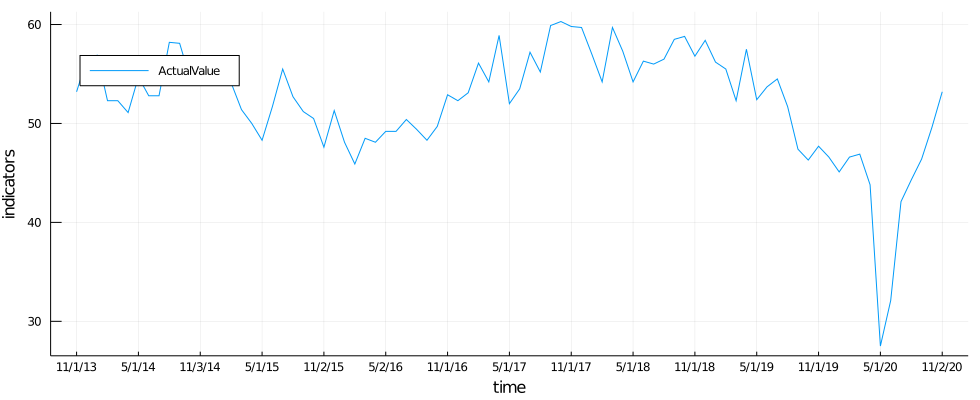

In [5]:
using Plots

record_count = size(df)[1]
rows = 1:record_count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(          dates, # x-axis: dates
               [  df[rows,3]       ], # y-axis
    label    = [  columns[3]    "" ]  ,
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

### set the original value column
- go back to the top "Setup" section and choose which column should be the "Orignal value"
- re-run the notebook

## Extract right columns

In [6]:
using DataFrames
df = DataFrame( Day      = df[:,1],                     # 1 
                Date     = df[:,2],                     # 2 
                Value    = df[:,original_value_column], # 3 
                Original = df[:,original_value_column]  # 4 
               )

columns = preview_data(df)
println()

7×4 DataFrame
│ Row │ Day    │ Date       │ Value   │ Original │
│     │ Int64  │ Date       │ Float64 │ Float64  │
├─────┼────────┼────────────┼─────────┼──────────┤
│ 1   │ 735173 │ 2013-11-01 │ 53.2    │ 53.2     │
│ 2   │ 735600 │ 2015-01-02 │ 56.8    │ 56.8     │
│ 3   │ 736024 │ 2016-03-01 │ 48.5    │ 48.5     │
│ 4   │ 736450 │ 2017-05-01 │ 52.0    │ 52.0     │
│ 5   │ 736877 │ 2018-07-02 │ 56.0    │ 56.0     │
│ 6   │ 737305 │ 2019-09-03 │ 47.4    │ 47.4     │
│ 7   │ 737731 │ 2020-11-02 │ 53.2    │ 53.2     │
 Dataset dimentions: (85, 4)

 variable columns:
1 Day
2 Date
3 Value
4 Original



## Quantize the values

- Quantization is a process of noramalizing the data
- I have decided to normalize the data for Int8 as I might try use Google Coral NPU
- minimum = -128.0
- maximum = 127.0

In [8]:
data_original = df[:, original_value_column] # keep original for display comparison later

quantize_column!(df, original_value_column)

columns = preview_data(df)
println()

bias for 0 value: 0.5019607843137255
Normalization was performend using formula y=(((x-min)/(max-min))*255)-128 
minimum = -128.0
maximum = 127.0
Save these values for later to run model preditions
7×4 DataFrame
│ Row │ Day    │ Date       │ Value   │ Original │
│     │ Int64  │ Date       │ Float64 │ Float64  │
├─────┼────────┼────────────┼─────────┼──────────┤
│ 1   │ 735173 │ 2013-11-01 │ 72.0    │ 53.2     │
│ 2   │ 735600 │ 2015-01-02 │ 100.0   │ 56.8     │
│ 3   │ 736024 │ 2016-03-01 │ 35.0    │ 48.5     │
│ 4   │ 736450 │ 2017-05-01 │ 62.0    │ 52.0     │
│ 5   │ 736877 │ 2018-07-02 │ 94.0    │ 56.0     │
│ 6   │ 737305 │ 2019-09-03 │ 27.0    │ 47.4     │
│ 7   │ 737731 │ 2020-11-02 │ 72.0    │ 53.2     │
 Dataset dimentions: (85, 4)

 variable columns:
1 Day
2 Date
3 Value
4 Original



### Draw Plots

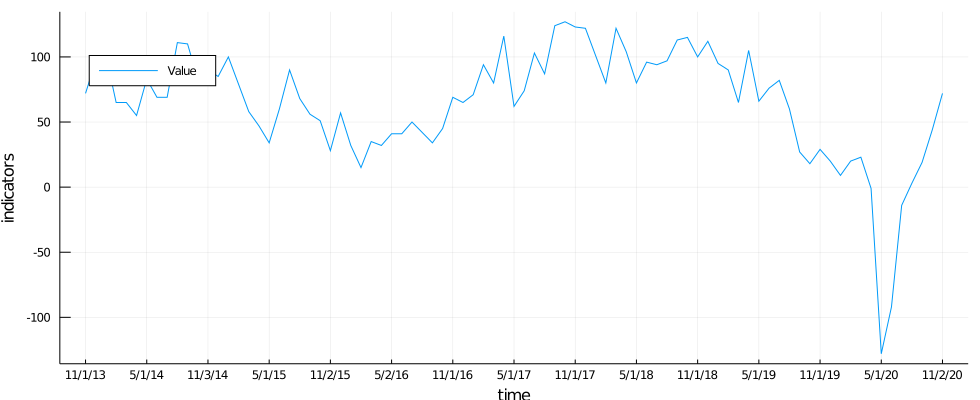

In [9]:
using Plots

count = size(df)[1]
rows = 1:count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(          dates, # x-axis: dates
               [  df[rows,3]    ], # y-axis
    label    = [  columns[3] ""   ]  ,
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

## Fill in Empty Dates

In [10]:
populate_missing_dates!(df)

In [13]:
df = sort(df, [:Day]);
count = size(df)[1]
first(df, 6)
columns = preview_data(df)
println()

7×4 DataFrame
│ Row │ Day    │ Date       │ Value   │ Original │
│     │ Int64  │ Date       │ Float64 │ Float64  │
├─────┼────────┼────────────┼─────────┼──────────┤
│ 1   │ 735173 │ 2013-11-01 │ 72.0    │ 53.2     │
│ 2   │ 735599 │ 2015-01-01 │ 85.0    │ 54.9     │
│ 3   │ 736025 │ 2016-03-02 │ 35.0    │ 48.5     │
│ 4   │ 736451 │ 2017-05-02 │ 62.0    │ 52.0     │
│ 5   │ 736877 │ 2018-07-02 │ 94.0    │ 56.0     │
│ 6   │ 737303 │ 2019-09-01 │ 60.0    │ 51.7     │
│ 7   │ 737729 │ 2020-10-31 │ 44.0    │ 49.6     │
 Dataset dimentions: (2559, 4)

 variable columns:
1 Day
2 Date
3 Value
4 Original

